In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skdt
from sklearn.cluster import KMeans

# Kmean cluster

In [33]:
bc_array = skdt.load_breast_cancer() 
type(bc_array)

sklearn.utils._bunch.Bunch

In [34]:
df_bc = pd.DataFrame(bc_array.data, columns=bc_array.feature_names)
df_bc.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df_bc['target'] = bc_array.target

In [36]:
points = df_bc[['mean radius','mean smoothness']]

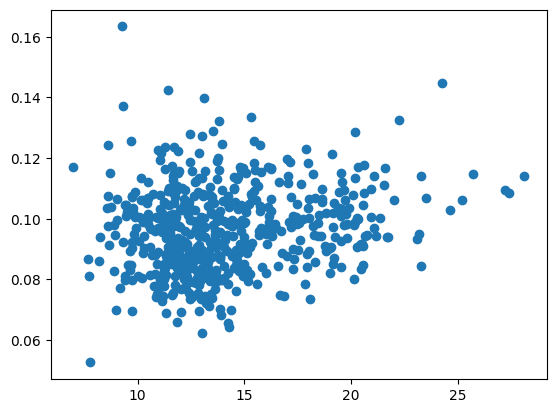

In [37]:
plt.scatter(points['mean radius'], points['mean smoothness'])

In [38]:
model = KMeans(n_clusters=2)

In [39]:
model.fit(points)

KMeans(n_clusters=2)

In [40]:
labels = model.labels_

In [41]:
labels

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [42]:
ds_kmeans = pd.DataFrame({
    'labels' : labels,
    'target' : df_bc.target
})

In [43]:
#untuk membandingkan
crosstab = pd.crosstab(ds_kmeans['labels'], ds_kmeans['target'])

In [44]:
crosstab

target,0,1
labels,,
0,76,351
1,136,6


# visualisasi

In [48]:
#mencari nilai centroid
centroid = model.cluster_centers_

In [49]:
centroid

array([[12.44571194,  0.09507148],
       [19.18387324,  0.10023577]])

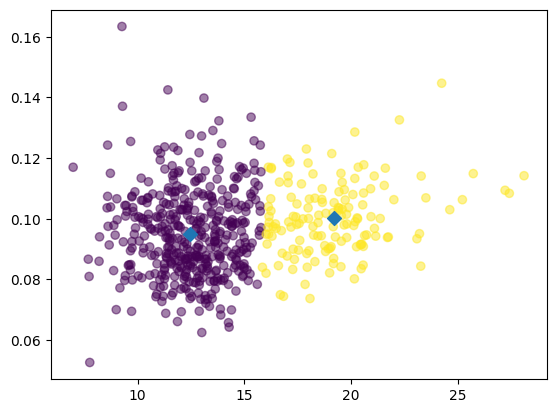

In [52]:
plt.scatter(points['mean radius'], points['mean smoothness'], alpha=.5, c=labels)
plt.scatter(centroid[:,0], centroid[:,1], marker='D', s=50 )
plt.show()

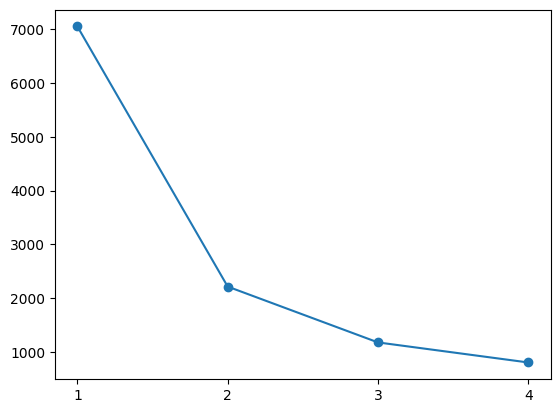

In [53]:
cluster_sum = range(1,5)
inertia =[]

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)

plt.plot(cluster_sum, inertia, '-o')
plt.xticks(cluster_sum)
plt.show()